In [1]:
import numpy as np
import pytesseract
from PIL import Image
import cv2
import os,argparse
import matplotlib.pyplot as plt
import re
import ftfy
import sys
import json
import io

In [3]:
# read the images with text
folder_dir = r"C:\Users\VSK\Downloads\OCR\Voter"

for images in os.listdir(folder_dir):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
        print(images)

test.jpg


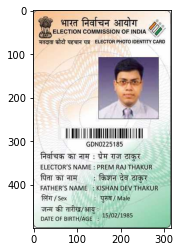

[array([[[238, 248, 255],
         [211, 220, 227],
         [227, 232, 236],
         ...,
         [255, 254, 255],
         [228, 228, 228],
         [254, 255, 255]],
 
        [[200, 209, 216],
         [249, 255, 255],
         [235, 239, 242],
         ...,
         [255, 254, 255],
         [254, 254, 254],
         [190, 191, 193]],
 
        [[245, 250, 254],
         [219, 223, 226],
         [215, 214, 212],
         ...,
         [210, 208, 209],
         [237, 237, 237],
         [254, 255, 255]],
 
        ...,
 
        [[255, 253, 254],
         [227, 225, 226],
         [255, 254, 255],
         ...,
         [254, 255, 255],
         [255, 255, 255],
         [243, 241, 244]],
 
        [[255, 254, 255],
         [239, 237, 238],
         [226, 224, 225],
         ...,
         [251, 253, 252],
         [250, 250, 250],
         [248, 246, 249]],
 
        [[194, 192, 193],
         [240, 238, 239],
         [255, 254, 255],
         ...,
         [226, 228, 227],
  

In [4]:
# read the images with text
images = []
def load_images(folder):
    for filename in os.listdir(folder):
        try:
            img = plt.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
                plt.imshow(img)
                plt.show()
                
        except:
            print("Cant import " + filename)
    return images

load_images(folder_dir)

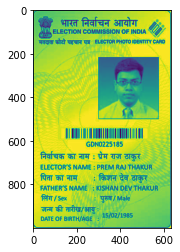

In [5]:
# resize the images
def resize_imgs():
    for img in images:
        img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        # convert to grayscale image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.show()
        
resize_imgs()

In [6]:
# Defining path to tesseract.exe and the image
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = path_to_tesseract

In [8]:
# Extract the text from the images
path_to_images = r"C:\Users\VSK\Downloads\OCR\Voter"
output_file = r"C:\Users\VSK\Downloads\OCR\output.txt"


def convert_to_text():
    # Iterating the images inside the folder
    for imageName in os.listdir(path_to_images):
        inputPath = os.path.join(path_to_images, imageName)
        img = Image.open(inputPath)
        
        # Extract text from image
        text = pytesseract.image_to_string(img, lang ="eng")
        
        # Write to a .txt file
        text_output = open(output_file, "a+")
        # providing the name of the image
        text_output.write(imageName + "\n")
        # providing the content in the image
        text_output.write(text + "\n")
        text_output.close()
        
        # Read the .txt file
        file = open(output_file, 'r')
        text = file.read()
        file.close()
        
        text = ftfy.fix_text(text)
        text = ftfy.fix_encoding(text)
        
convert_to_text()

In [35]:
def voterid_read_data(text):
    text1 = []
    
    # Splitting the lines to sort the text paragraph wise
    lines = text.split('\n')
    for lin in lines:
        s = lin.strip()
        s = s.rstrip()
        s = s.lstrip()
        text1.append(s)
        
    # Finding the electors number 
    voter_no = findword(text1, '(ELECTION COMMISSION OF INDIA|CARD|IDENTITY CARD)$')
    print (voter_no)
    voter_no = voter_no[0]
    voter_no = voter_no.replace(" ", "")
        
    lines = text
        
    for x in lines.split('\n'):
        _ = x.split()
        if ([w for w in _ if re.search("(Elector's|ELECTOR'S)$", w)]):    
            person_name = x
            person_name = person_name.split(':')[1].strip()
            full_name = person_name
                
        # Finding the father/husband/mother name        
        if ([w for w in _ if re.search("(Father's|Mother's|FATHER'S|MOTHER'S)$", w)]):
            elder_name = x
            elder_name = elder_name.split(':')[1].strip()
                
        # Finding the gender of the electoral candidate
        if ([w for w in _ if re.search('(Male|MALE|male)$', w)]):
            sex = "Male"
        elif ([w for w in _ if re.search('(Female|FEMALE|female)$', w)]):
            sex = "Female"
                
        # Finding the Date of Birth 
        if ([w for w in _ if re.search('(Year|YEAR|Birth|Date|Date of Birth|DATE OF BIRTH|DOB)$', w)]):
            dob = x
            dob = dob.split(':')[1].strip()
    
    # Converting the extracted informaton into json
    return lines

In [33]:
# Using regex to find the neceesary information
def findword(textlist, wordstring):
    lineno = -1
    for wordline in textlist:
        xx = wordline.split()
        if ([w for w in xx if re.search(wordstring, w)]):
            lineno = textlist.index(wordline)
            textlist = textlist[lineno+1:]
            return textlist
    return textlist

In [36]:
def extract_data():
    # Iterating the images inside the folder
    for imageName in os.listdir(path_to_images):
        inputPath = os.path.join(path_to_images, imageName)
        img = Image.open(inputPath)
        
        # Extract text from image
        text = pytesseract.image_to_string(img, lang ="eng")
        
        # Read the Voter-ID data
        print("-----------------Voter ID details-----------------------")
        data = voterid_read_data(text)
        
        print(data)
            
extract_data()

-----------------Voter ID details-----------------------
['', 'AM', '', 'GDNO225185', 'frataa or aa : WH WT SGT', "ELECTOR'S NAME : PREM RA THAKUR", 'fam sram sen aace', 'FATHER’S NAME. : KISHE EV THAKUR', '', '']
ELECTION COMMISSION OF INDIA <@%
‘aay let Wea WA ELECTOR PHOTO IDENTITY CARD

AM

GDNO225185
frataa or aa : WH WT SGT
ELECTOR'S NAME : PREM RA THAKUR
fam sram sen aace
FATHER’S NAME. : KISHE EV THAKUR


